# Imports and Installs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

from tqdm import tqdm
from geopy.distance import geodesic

# Global Variables

In [2]:
data_dir = "/content/drive/MyDrive/Classes/CSCE 5320 Data Visualization/Data Viz. Project/"

# Load Data

In [3]:
df_cars = pd.read_csv(data_dir + "Road Accident Data.csv", index_col="Accident_Index")
df_cars.head()

,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,Longitude,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
Accident_Index,,,,,,,,,,,,,,,,,,,,
200901BS70001,1/1/2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,-0.201349,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
200901BS70002,1/5/2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,NaN,-0.199248,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
200901BS70003,1/4/2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,NaN,-0.179599,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
200901BS70004,1/5/2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,NaN,-0.203110,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
200901BS70005,1/6/2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,NaN,-0.173445,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


In [4]:
df_buildings = pd.read_excel(data_dir + "Building.xls", index_col="OBJECTID")
df_buildings.head()

,SectorName,Department,PropertyCentre,Region,ePIMSPropertyRef,ePIMSHoldingRef,DeptBuildingRef,DepartmentPropertyRef,PropertyName,HoldingName,...,BuildingType,ConstructionDate,BuildingUsage,PlanningUseClass,NumberOfFloors,RefurbDate,ListedBuildingDescription,DECCertificateRef,DECPropertyRef,DECOperationalRating
OBJECTID,,,,,,,,,,,,,,,,,,,,,
1737475,Central Civil Estate,Department for Transport,DFT - MARITIME AND COASTGUARD AGENCY,Scotland,11219,2,246338,2852,RAF SAXA VORD - DOMESTIC SITE,Saxa Vord RS,...,Not Known,Unknown,Radio Site,Sui Generis,NaN,NaT,Not Set,-1,-1,NaN
1737920,Central Civil Estate,Department of Health and Social Care,DHSC - NHS ENGLAND,East Midlands,11724,5,NTDA,2390,CARDINAL SQUARE,NHS Trust Development Authority,...,Standard Office Building,Unknown,Office,Class B1 – Business Class,NaN,NaT,Not Set,-1,-1,NaN
1737950,Central Civil Estate,Department of Health and Social Care,DHSC - NHS ENGLAND,South West,11765,2,NHSE,3801,SANGER HOUSE,SANGER HOUSE - NHS ENGLAND SOUTH WEST,...,Standard Office Building,Unknown,Office,Class B1 – Business Class,NaN,NaT,Not Set,-1,-1,NaN
1738084,Central Civil Estate,Department of Health and Social Care,DHSC - HEALTH EDUCATION ENGLAND,Yorkshire and the Humber,11918,6,HEE,3986,DON VALLEY HOUSE,First Floor,...,Standard Office Building,Unknown,Office,Class B1 – Business Class,NaN,NaT,Unknown,-1,-1,NaN
1738084,Central Civil Estate,Department of Health and Social Care,DHSC - HEALTH EDUCATION ENGLAND,Yorkshire and the Humber,11918,7,HEE,3986,DON VALLEY HOUSE,Fourth Floor,...,Standard Office Building,Unknown,Office,Class B1 – Business Class,NaN,NaT,Unknown,-1,-1,NaN


# Clean Data

In [5]:
# Get shapes
print("Crashes:", df_cars.shape)
print("Buildings:", df_buildings.shape)

Crashes: (307973, 20)
Buildings: (9643, 35)


In [6]:
# Drop rows where latitude or longitude are mising
df_cars.dropna(subset=["Latitude", "Longitude"], how="all", inplace=True)
df_buildings.dropna(subset=["Latitude", "Longitude"], how="all", inplace=True)

In [7]:
df_cars = df_cars.sample(10000, random_state=42, axis=0)

In [8]:
# Get shapes
print("Crashes:", df_cars.shape)
print("Buildings:", df_buildings.shape)

Crashes: (10000, 20)
Buildings: (9640, 35)


# Question 1: Does working in a specific building make you more likely to be involved in a car crash?

## Plot Latitude vs. Longitude for Buildings vs. Accidents

In [9]:
# Set up lists
cars_lat = []
cars_lon = []
buildings_lat = []
buildings_lon = []

In [10]:
# Iterate over cars df
for i, row in df_cars.iterrows():
    cars_lat.append(row["Latitude"])
    cars_lon.append(row["Longitude"])

# Iterate over buildings df
for i, row in df_buildings.iterrows():
    buildings_lat.append(row["Latitude"])
    buildings_lon.append(row["Longitude"])

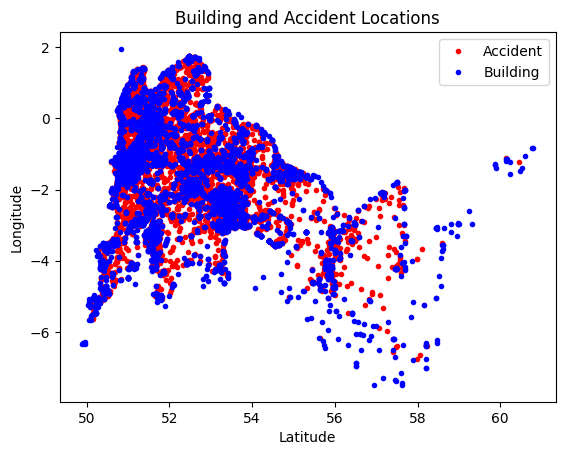

In [11]:
# Plot
plt.plot(cars_lat, cars_lon, ".r", label="Accident")
plt.plot(buildings_lat, buildings_lon, ".b", label="Building")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Building and Accident Locations")
plt.legend()
plt.show()

## Get Distances Between Buildings and Crashes

In [13]:
# Get crash coordinates
crash_pos = []
for lat, lon in zip(cars_lat, cars_lon):
    crash_pos.append([lat, lon])

# Get building coordinates
building_pos = []
for lat, lon in zip(buildings_lat, buildings_lon):
    building_pos.append([lat, lon])

## Correlate Features of Buildings With Crashes Within 100 Meters vs. Buildings Without Crashes Within 100 Meters

In [ ]:
# Set up lists
with_crash = []
without_crash = []

# Get crashes w/in 500 meters
for idx, row in tqdm(df_buildings.iterrows()):
    crashes = 0
    for cp in crash_pos:
        if abs(cp[0] - row["Latitude"]) * 111111 <= 500:
            if  abs(cp[0] - row["Longitude"]) * 40075000 * math.cos(abs(cp[0] - row["Latitude"])) / 360.0:
                crashes += 1
    if crashes > 0:
        with_crash.append([idx, crashes])
    else:
        without_crash.append(idx)

921it [33:04,  2.15s/it]


KeyboardInterrupt: 

In [ ]:
# Set up lists
with_crash = []
without_crash = []

# Get crashes w/in 500 meters
for i, bp in enumerate(building_pos):
    id_building = df_buildings.index[(df_buildings.Latitude == bp[0]) & (df_buildings.Longitude == bp[1])].tolist()[0]
    crashes = []
    for j, row in enumerate(df_distances):
        dist = row[i]
        if dist:
            cp = crash_pos[j]
            id_crash = df_cars.index[(df_cars.Latitude == cp[0]) & (df_cars.Longitude == cp[1])].tolist()[0]
            crashes.append(id_crash)

    # Cluster buildings
    if len(crashes) > 0:
        with_crash.append([id_building, crashes])
    else:
        without_crash.append(id_building)

### Plot Buildings With Nearby Crashes vs. Without Nearby Crashes

In [ ]:
plt.bar(["With Nearby Crashes", "Without Nearby Crashes"], [len(with_crash), len(without_crash)])
plt.ylabel("Number of Buildings")
plt.title("Counts of Buildings With and Without Nearby Crashes")
plt.show()

### Plot Number of Nearby Crashes

In [ ]:
# Get counts
counts = []
for row in with_crash:
    counts.append(len(row[1]))
for i in range(len(without_crash)):
    counts.append(0)
counts = sorted(counts)

buildings = [i for i in range(len(counts))]

In [ ]:
plt.bar(buildings, counts)
plt.xlabel("Buildings")
plt.ylabel("Number of Crashes")
plt.title("Number of Nearby Crashes per Building")
plt.show()

### Correlate Featuers

In [ ]:
# Build counter
dic = {}
for col in list(df_buildings.columns):
    dic.update({col: {}})
    uniques = df_buildings[col].unique()
    for u in uniques:
        dic[col].update({u: [0, 0]})

# Get counts of features per class
for i, row in df_buildings.iterrows():
    idx = row.index
    c = None
    if idx in without_crash:
        c = 0
    else:
        c = 1
    for col in list(df_buildings.columns):
        uniques = df_buildings[col].unique()
        for u in uniques:
            dic[col][u][c] += 1

In [ ]:
def plot_correlation(counter, column):
    classes = ["Without Nearby Crashes", "With Nearby Crashes"]

    x = np.arange(len(classes))
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')

    for attribute, measurement in counter.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=3)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel("Value Count")
    ax.set_title("Comparison of %s Values Based on Crashes")
    ax.set_xticks(x + width, classes)
    ax.legend(loc='upper left', ncols=2)
    # ax.set_ylim(0, 250)

    plt.show()

In [ ]:
for col in list(df_buildings.columns):
    print(col)

In [ ]:
plot_correlation(dic[], )

## Correlate Features of Crashes With Buildings Within 100 Meters vs. Crashes Without Buildings Within 100 Meters

In [ ]:
def within_radius(lat1, lon1, lat2, lon2):
    if math.sqrt(abs(lat1 - lat2)**2 + abs(lon1 - lon2)**2) * 111139 <= 500:
        return True
    return False

In [27]:
# Set up lists
with_bldg = []
without_bldg = []

# Get crashes w/in 500 meters
for idx, row in tqdm(df_cars.iterrows()):
    buildings = 0
    for bp in building_pos:
        if abs(bp[0] - row["Latitude"]) * 111111 <= 500:
            if  abs(bp[0] - row["Longitude"]) * 40075000 * math.cos(abs(bp[0] - row["Latitude"])) / 360.0:
                buildings += 1
    if buildings > 0:
        with_bldg.append([idx, buildings])
    else:
        without_bldg.append(idx)

10000it [05:37, 29.67it/s]


### Plot Number of Nearby Buildings

In [44]:
num_bldg = [0]
crashes = [len(without_bldg)]

for row in with_bldg:
    if row[1] not in num_bldg:
        num_bldg.append(row[1])
        crashes.append(0)

    idx = num_bldg.index(row[1])
    crashes[idx] += 1

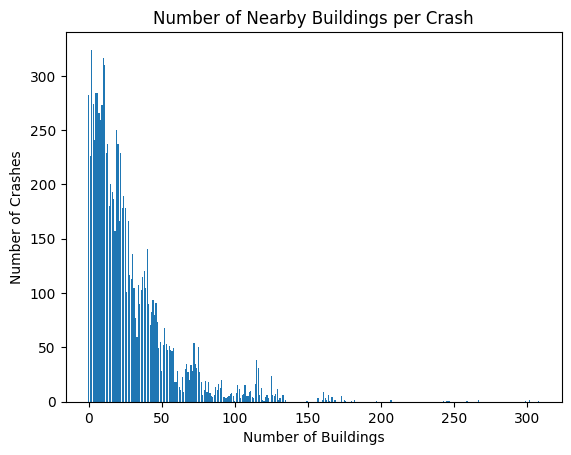

In [47]:
x = [x for x,y in sorted(zip(num_bldg, crashes))]
y = [y for x,y in sorted(zip(num_bldg, crashes))]

plt.bar(x, y)
plt.xlabel("Number of Buildings")
plt.ylabel("Number of Crashes")
plt.title("Number of Nearby Buildings per Crash")
plt.show()

### Plot Crashes With Nearby Buildings and Crashes Without Nearby Buildings

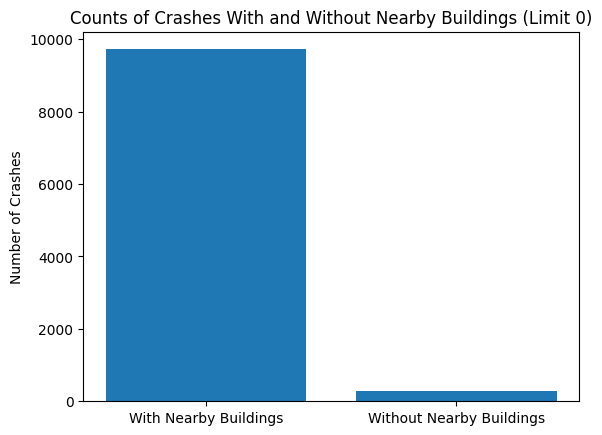

In [50]:
plt.bar(["With Nearby Buildings", "Without Nearby Buildings"], [len(with_bldg), len(without_bldg)])
plt.ylabel("Number of Crashes")
plt.title("Counts of Crashes With and Without Nearby Buildings (Limit 0)")
plt.show()

In [48]:
with_bldg_new = []
without_bldg_new = [x for x in with_bldg]
for row in with_bldg:
    if row[1] < 5:
        without_bldg_new.append(row[0])
    else:
        with_bldg_new.append(row)

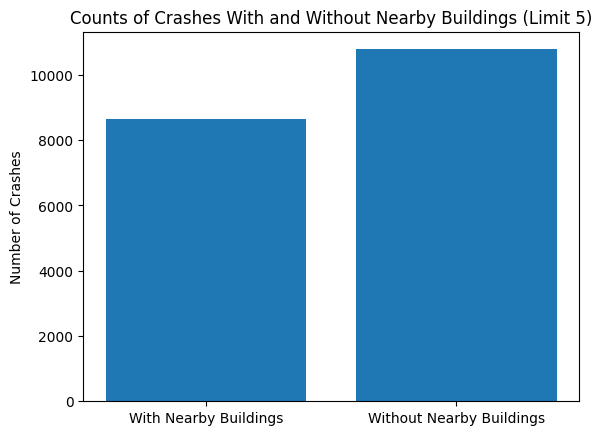

In [51]:
plt.bar(["With Nearby Buildings", "Without Nearby Buildings"], [len(with_bldg_new), len(without_bldg_new)])
plt.ylabel("Number of Crashes")
plt.title("Counts of Crashes With and Without Nearby Buildings (Limit 5)")
plt.show()

### Correlate Features

In [41]:
# Build counter
dic = {}
for col in list(df_cars.columns):
    dic.update({col: {}})
    uniques = df_cars[col].unique()
    for u in uniques:
        dic[col].update({u: [0, 0]})

# Get counts of features per class
for i, row in df_cars.iterrows():
    c = None
    if i in without_bldg:
        c = 0
    else:
        c = 1
    for col in list(df_cars.columns):
        uniques = df_cars[col].unique()
        for u in uniques:
            dic[col][u][c] += 1

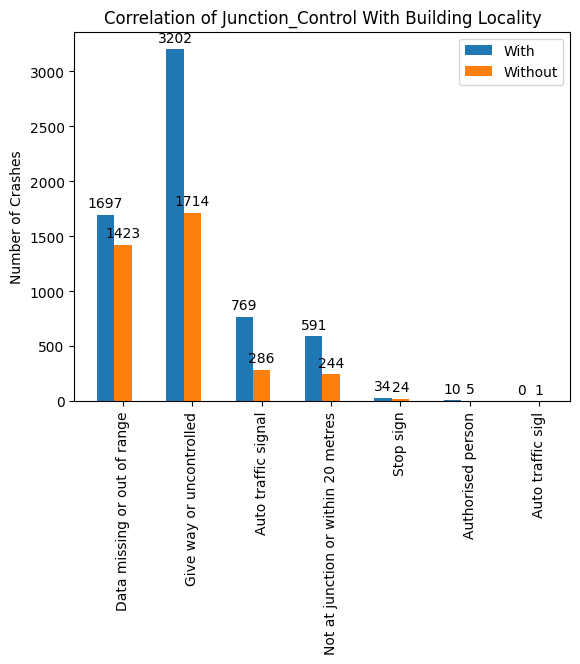

In [119]:
def plot_c(df, col):
    u = list(df[col].unique())
    dic = {"With": [0 for i in range(len(u))],
           "Without": [0 for i in range(len(u))]}

    for i, row in df_cars.iterrows():
        idx = u.index(row[col])
        if i in without_bldg:
            dic["Without"][idx] += 1
        else:
            dic["With"][idx] += 1

    x = np.arange(len(u))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots()

    for attribute, measurement in dic.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=3)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Number of Crashes')
    ax.set_title('Correlation of %s With Building Locality'%col)
    ax.set_xticks(x + width, u)
    ax.tick_params(axis="x", labelrotation=90)
    ax.legend()

    plt.show()


plot_c(df_cars, "Junction_Control")

In [120]:
for col in list(df_cars.columns):
    print(col)

Accident Date
Day_of_Week
Junction_Control
Junction_Detail
Accident_Severity
Latitude
Light_Conditions
Local_Authority_(District)
Carriageway_Hazards
Longitude
Number_of_Casualties
Number_of_Vehicles
Police_Force
Road_Surface_Conditions
Road_Type
Speed_limit
Time
Urban_or_Rural_Area
Weather_Conditions
Vehicle_Type


In [121]:
dic.keys()

dict_keys(['Accident Date', 'Day_of_Week', 'Junction_Control', 'Junction_Detail', 'Accident_Severity', 'Latitude', 'Light_Conditions', 'Local_Authority_(District)', 'Carriageway_Hazards', 'Longitude', 'Number_of_Casualties', 'Number_of_Vehicles', 'Police_Force', 'Road_Surface_Conditions', 'Road_Type', 'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type'])

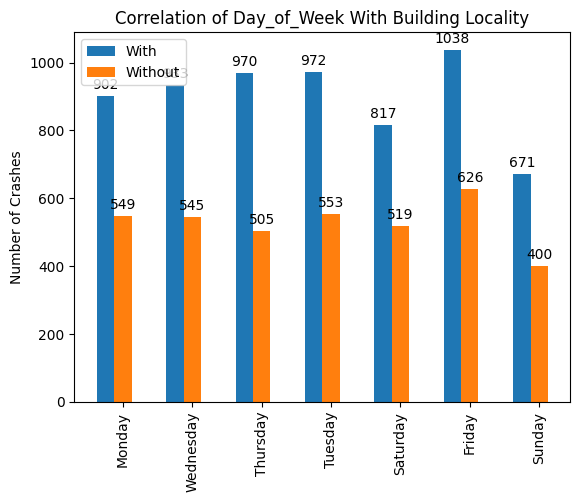

In [122]:
plot_c(df_cars, "Day_of_Week")

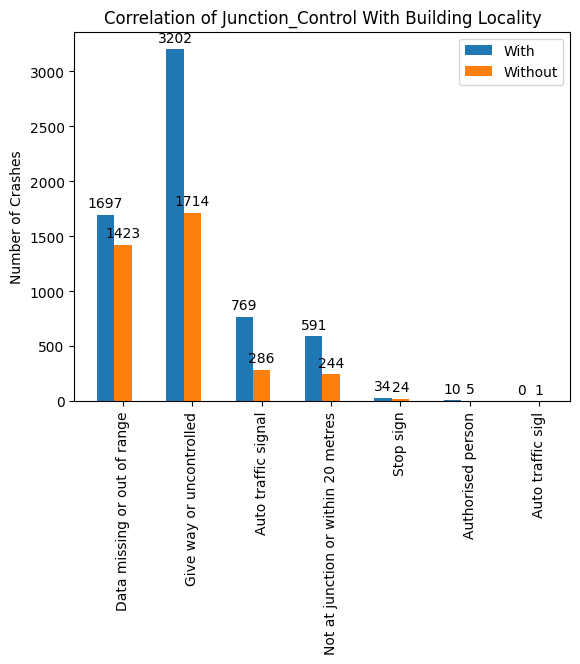

In [123]:
plot_c(df_cars, "Junction_Control")

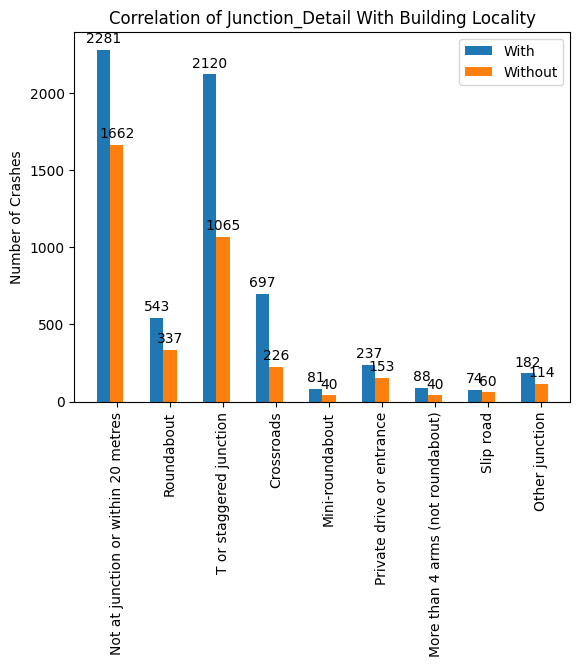

In [124]:
plot_c(df_cars, "Junction_Detail")

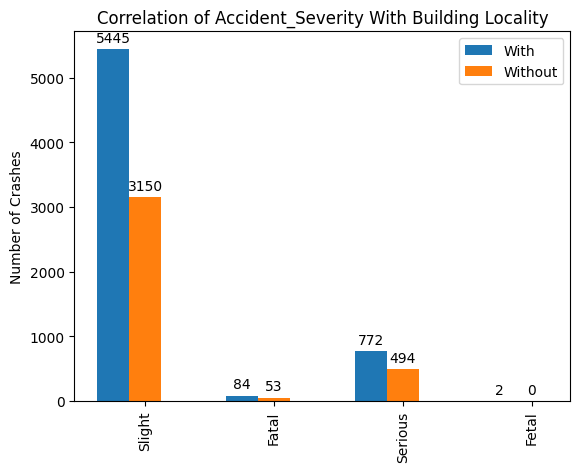

In [125]:
plot_c(df_cars, "Accident_Severity")

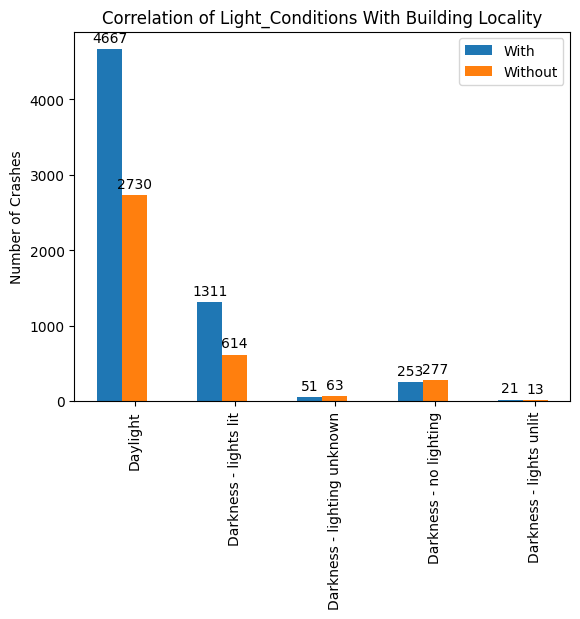

In [126]:
plot_c(df_cars, "Light_Conditions")

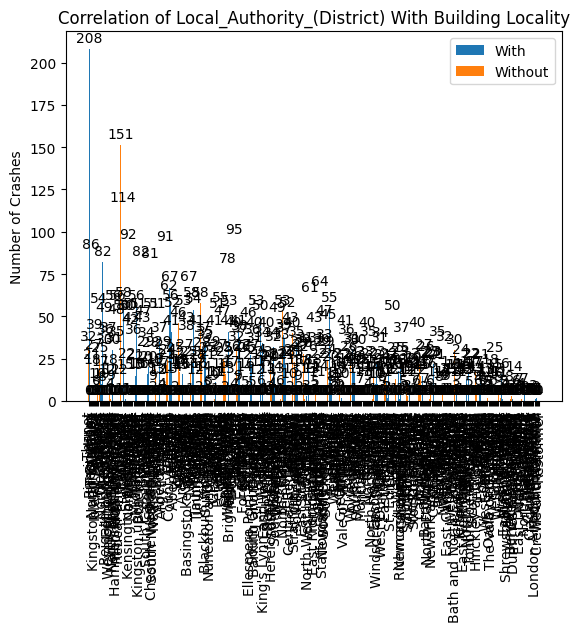

In [127]:
plot_c(df_cars, "Local_Authority_(District)")

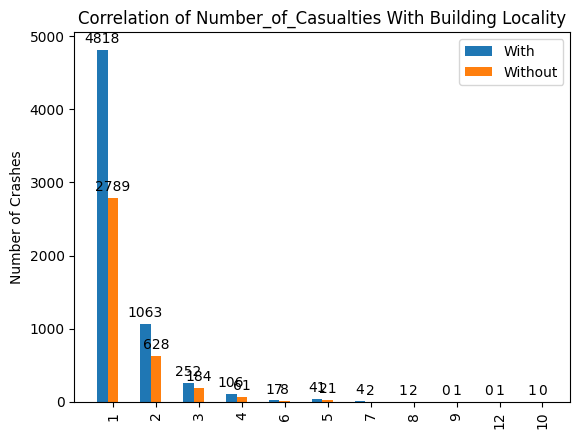

In [128]:
plot_c(df_cars, "Number_of_Casualties")

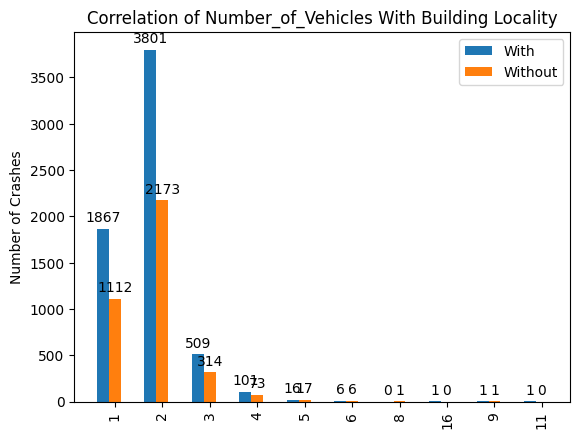

In [129]:
plot_c(df_cars, "Number_of_Vehicles")

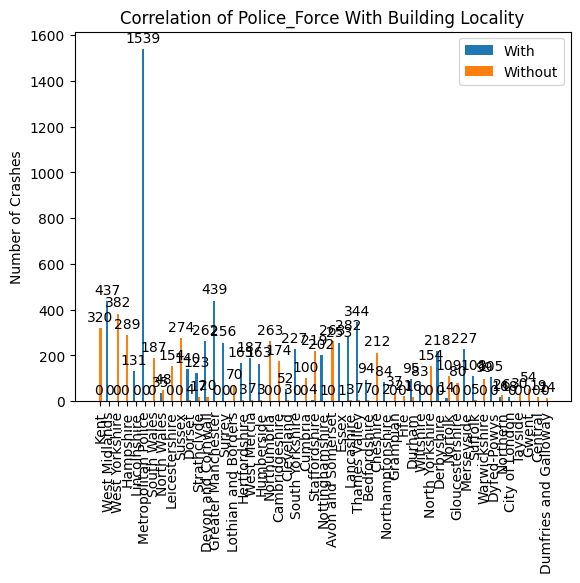

In [130]:
plot_c(df_cars, "Police_Force")

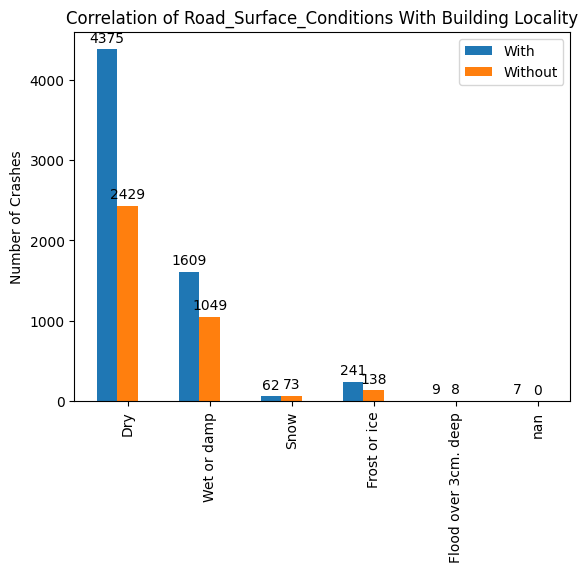

In [131]:
plot_c(df_cars, "Road_Surface_Conditions")

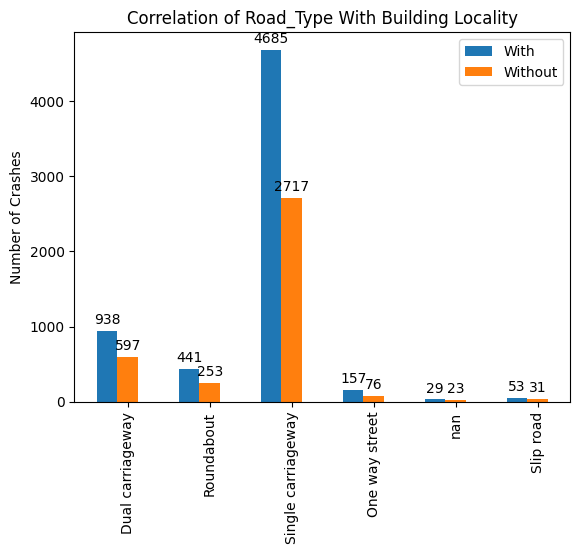

In [132]:
plot_c(df_cars, "Road_Type")

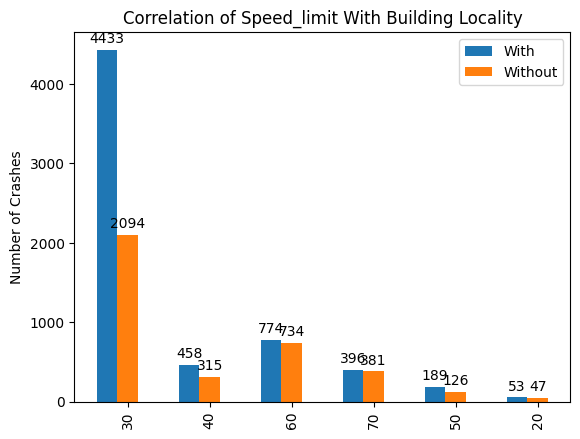

In [133]:
plot_c(df_cars, "Speed_limit")

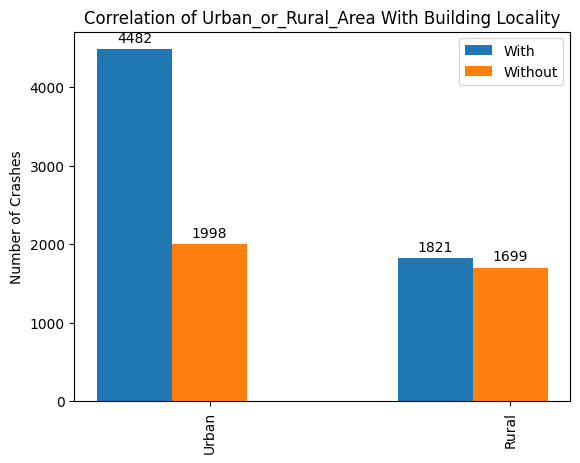

In [134]:
plot_c(df_cars, "Urban_or_Rural_Area")

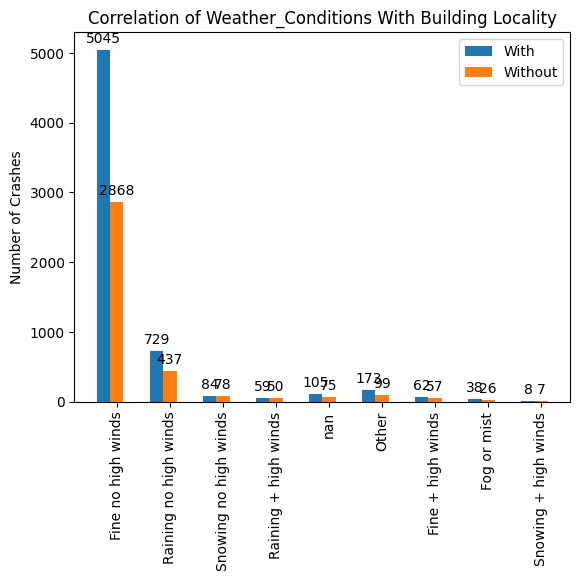

In [135]:
plot_c(df_cars, "Weather_Conditions")

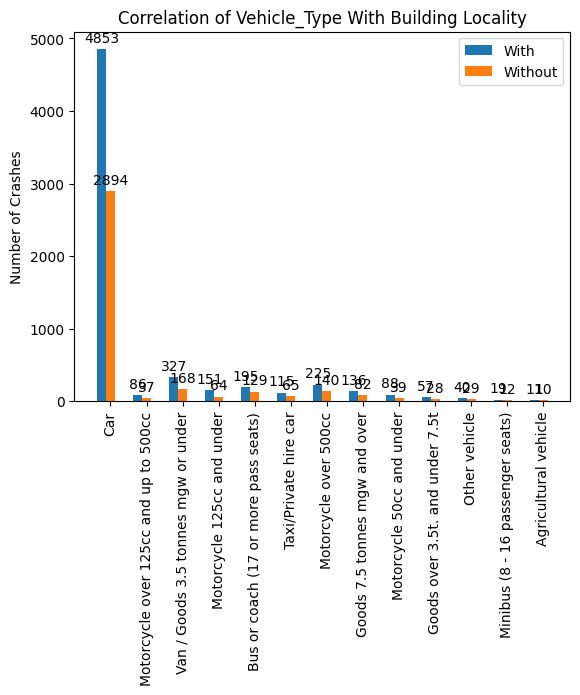

In [136]:
plot_c(df_cars, "Vehicle_Type")

# Question 2: Should I consider alternate routes based on crash sites?